<a href="https://colab.research.google.com/github/SnehalB06/Scene-Parsing/blob/master/semantic_segmentation_ade20k_u_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Installing Segmentation models library
!pip install segmentation_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.2 MB/s eta 0:00:00


In [3]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [4]:
# importing required packages...
import os, glob
import cv2, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
#from patchify import patchify
from PIL import Image
import segmentation_models as sm
import tensorflow as tf
from tensorflow.keras.metrics import MeanIoU
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from tensorflow.keras.models import load_model
from tqdm import tqdm
from random import sample
import pickle
from tensorflow.keras.callbacks import Callback, ModelCheckpoint,  EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam

In [5]:
traing_img_path = r"/content/drive/MyDrive/ADEChallengeData2016/images/training/"
annotation_img_path = r"/content/drive/MyDrive/ADEChallengeData2016/annotations/training/"

street_training_img = "/content/drive/MyDrive/ADEChallengeData2016/Street/images/training/"
street_training_mask = "/content/drive/MyDrive/ADEChallengeData2016/Street/annonations/training/"

In [ ]:
!ls -lrt /content/drive/MyDrive/ADEChallengeData2016/Street/images/training/

total 157681
-rw------- 1 root root  44056 Mar  9 02:41 ADE_train_00016859.jpg
-rw------- 1 root root  60443 Mar  9 02:41 ADE_train_00016860.jpg
-rw------- 1 root root  95415 Mar  9 02:41 ADE_train_00016861.jpg
-rw------- 1 root root  68710 Mar  9 02:41 ADE_train_00016862.jpg
-rw------- 1 root root  63543 Mar  9 02:41 ADE_train_00016863.jpg
-rw------- 1 root root  57890 Mar  9 02:41 ADE_train_00016858.jpg
-rw------- 1 root root  61979 Mar  9 02:41 ADE_train_00016864.jpg
-rw------- 1 root root  70078 Mar  9 02:41 ADE_train_00016865.jpg
-rw------- 1 root root  34000 Mar  9 02:41 ADE_train_00016866.jpg
-rw------- 1 root root  54127 Mar  9 02:41 ADE_train_00016867.jpg
-rw------- 1 root root  69380 Mar  9 02:41 ADE_train_00016868.jpg
-rw------- 1 root root  81571 Mar  9 02:41 ADE_train_00016869.jpg
-rw------- 1 root root  99319 Mar  9 02:41 ADE_train_00016870.jpg
-rw------- 1 root root  76226 Mar  9 02:41 ADE_train_00016871.jpg
-rw------- 1 root root  89528 Mar  9 02:41 ADE_train_00016872.j

In [ ]:
!ls -lrt /content/drive/MyDrive/ADEChallengeData2016/Street/annotations/training/

ls: cannot access '/content/drive/MyDrive/ADEChallengeData2016/Street/annotations/training/': No such file or directory



*Copying training images*

In [ ]:
import shutil

for i in range(16858,24503):
  img_name = 'ADE_train_000'+str(i)+'.jpg'
  mask_name = 'ADE_train_000'+str(i)+'.png'

  #print(img_name)
  #print(mask_name)
  #print(i)

  img_path = os.path.join(traing_img_path,img_name)
  mask_path = os.path.join(annotation_img_path,mask_name)
  print(img_path)
  print(mask_path)

  #print(os.path.exists(img_path) , os.path.exists(mask_path))
  print(i)

  if os.path.exists(img_path) and os.path.exists(mask_path):
    shutil.copy(img_path,street_training_img)
    shutil.copy(mask_path,street_training_mask)




Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/ADEChallengeData2016/annotations/training/ADE_train_00022836.png
22836
/content/drive/MyDrive/ADEChallengeData2016/images/training/ADE_train_00022837.jpg
/content/drive/MyDrive/ADEChallengeData2016/annotations/training/ADE_train_00022837.png
22837
/content/drive/MyDrive/ADEChallengeData2016/images/training/ADE_train_00022838.jpg
/content/drive/MyDrive/ADEChallengeData2016/annotations/training/ADE_train_00022838.png
22838
/content/drive/MyDrive/ADEChallengeData2016/images/training/ADE_train_00022839.jpg
/content/drive/MyDrive/ADEChallengeData2016/annotations/training/ADE_train_00022839.png
22839
/content/drive/MyDrive/ADEChallengeData2016/images/training/ADE_train_00022840.jpg
/content/drive/MyDrive/ADEChallengeData2016/annotations/training/ADE_train_00022840.png
22840
/content/drive/MyDrive/ADEChallengeData2016/images/training/ADE_train_00022841.jpg
/content/drive/MyDrive/ADEChallengeData2016/annotations/training

*Copying validation images* **bold text**

In [ ]:
street_validation_img = "/content/drive/MyDrive/ADEChallengeData2016/Street/images/validation/"
street_validation_mask = "/content/drive/MyDrive/ADEChallengeData2016/Street/annotations/validation/"

validation_img_path = r"/content/drive/MyDrive/ADEChallengeData2016/images/validation/"
validation_annotation_img_path = r"/content/drive/MyDrive/ADEChallengeData2016/annotations/validation/"

In [ ]:
import shutil

for i in range(777,1000) : #(1995)
  img_name = 'ADE_val_00000'+str(i)+'.jpg'
  mask_name = 'ADE_val_00000'+str(i)+'.png'

  #print(img_name)
  #print(mask_name)
  #print(i)

  img_path = os.path.join(validation_img_path,img_name)
  mask_path = os.path.join(validation_annotation_img_path,mask_name)
  print(img_path)
  print(mask_path)

  #print(os.path.exists(img_path) , os.path.exists(mask_path))
  print(i)

  if os.path.exists(img_path) and os.path.exists(mask_path):
    shutil.copy(img_path,street_validation_img)
    shutil.copy(mask_path,street_validation_mask)


/content/drive/MyDrive/ADEChallengeData2016/images/validation/ADE_val_00000777.jpg
/content/drive/MyDrive/ADEChallengeData2016/annotations/validation/ADE_val_00000777.png
777
/content/drive/MyDrive/ADEChallengeData2016/images/validation/ADE_val_00000778.jpg
/content/drive/MyDrive/ADEChallengeData2016/annotations/validation/ADE_val_00000778.png
778
/content/drive/MyDrive/ADEChallengeData2016/images/validation/ADE_val_00000779.jpg
/content/drive/MyDrive/ADEChallengeData2016/annotations/validation/ADE_val_00000779.png
779
/content/drive/MyDrive/ADEChallengeData2016/images/validation/ADE_val_00000780.jpg
/content/drive/MyDrive/ADEChallengeData2016/annotations/validation/ADE_val_00000780.png
780
/content/drive/MyDrive/ADEChallengeData2016/images/validation/ADE_val_00000781.jpg
/content/drive/MyDrive/ADEChallengeData2016/annotations/validation/ADE_val_00000781.png
781
/content/drive/MyDrive/ADEChallengeData2016/images/validation/ADE_val_00000782.jpg
/content/drive/MyDrive/ADEChallengeData201

In [6]:
street_training_img = "/content/drive/MyDrive/ADEChallengeData2016/Street/images/training/*"
street_training_mask = "/content/drive/MyDrive/ADEChallengeData2016/Street/annotations/training/"

In [7]:
multipleImages = glob.glob(street_training_img)
random_images = sample(multipleImages, min(500, len(multipleImages)))
#random_images = sample(range(20000), random.randint(10,40))

In [ ]:
random_images

['/content/drive/MyDrive/ADEChallengeData2016/Street/images/training/ADE_train_00017744.jpg',
 '/content/drive/MyDrive/ADEChallengeData2016/Street/images/training/ADE_train_00017408.jpg',
 '/content/drive/MyDrive/ADEChallengeData2016/Street/images/training/ADE_train_00017942.jpg',
 '/content/drive/MyDrive/ADEChallengeData2016/Street/images/training/ADE_train_00019232.jpg',
 '/content/drive/MyDrive/ADEChallengeData2016/Street/images/training/ADE_train_00018682.jpg',
 '/content/drive/MyDrive/ADEChallengeData2016/Street/images/training/ADE_train_00017324.jpg',
 '/content/drive/MyDrive/ADEChallengeData2016/Street/images/training/ADE_train_00017784.jpg',
 '/content/drive/MyDrive/ADEChallengeData2016/Street/images/training/ADE_train_00017005.jpg',
 '/content/drive/MyDrive/ADEChallengeData2016/Street/images/training/ADE_train_00018563.jpg',
 '/content/drive/MyDrive/ADEChallengeData2016/Street/images/training/ADE_train_00017383.jpg',
 '/content/drive/MyDrive/ADEChallengeData2016/Street/images/

In [ ]:
#Selecting annotations and images
iamges_for_training = []
iamges_for_training_annotations = []

In [8]:
def load_images_bw_mask(image_path):
    image = cv2.imread(image_path,0)
    #print(image.shape)
    #image = cv2.cvtColor(image)

    image = cv2.resize(image, (128, 128))
    image = Image.fromarray(image)
    image = np.array(image)
    return image

In [9]:
def load_images_bw(image_path):
    image = cv2.imread(image_path,1)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (128, 128))
    image = Image.fromarray(image)
    image = np.array(image)
    return image

In [10]:
j=0
image_dataset = []
mask_images = []

In [12]:
def image_selection(traing_img_path, annotation_path):
  multipleImages = glob.glob(traing_img_path)
  random_images = list(sample(multipleImages, min(800, len(multipleImages))))
  mask_images = []
  image_dataset = []
  mask_dataset = []
  i=0

  for image in random_images:
    #print(image)
    if image.endswith(".jpg"):
        img_path = os.path.join(traing_img_path,image)
        mask_name = img_path.split('.jpg')[0] + '.png'
        mask_name = mask_name.replace("images", "annotations")
        #mask_images.append(mask_name)
        image_dataset.append(load_images_bw(img_path)[:,:,0])

        if mask_name.endswith(".png"):
          mask_dataset.append(load_images_bw_mask(mask_name))
        i=i+1
        if i==800:
          break

  return image_dataset,mask_dataset


In [13]:
image_dataset,mask_dataset = image_selection(street_training_img,street_training_mask)

In [14]:
len(image_dataset)


800

In [ ]:
len(mask_images),

(0,)

In [ ]:
mask_images

[]

In [ ]:
!nvidia-smi

Sat Mar  9 20:53:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              40W / 300W |  15130MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
len(mask_images)


0

In [15]:
len(mask_dataset)

800

In [16]:
n_classes = len(np.unique(mask_dataset))

In [17]:
n_classes

151

231


Text(0.5, 1.0, 'Mask')

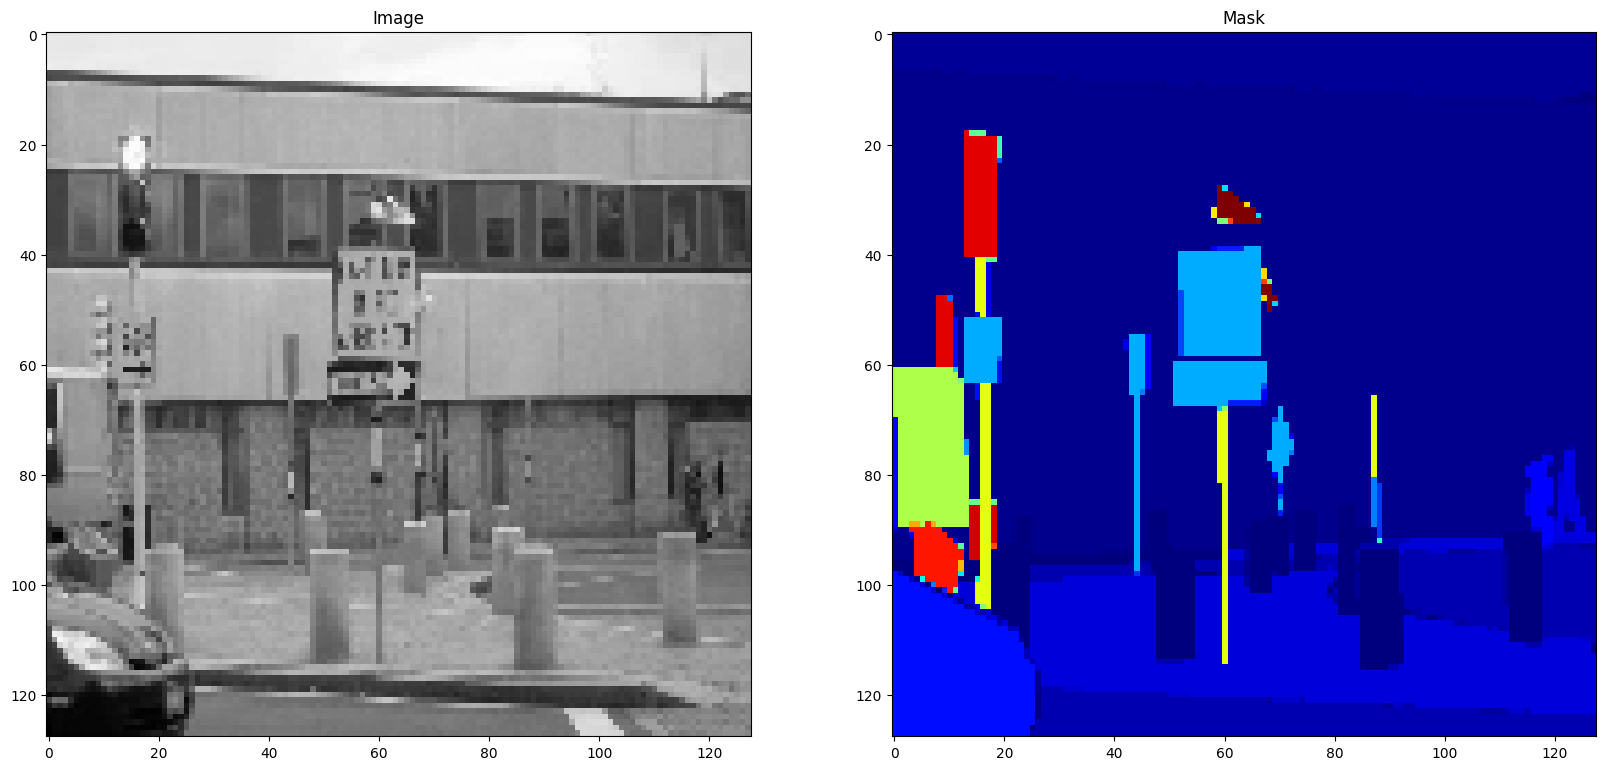

In [18]:
# Sanity check...
import random
image_number = random.randint(0, len(image_dataset))
print(image_number)
#image_number=45
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(image_dataset[image_number],cmap='gray')
plt.title("Image")
plt.subplot(122)
plt.imshow(mask_dataset[image_number],cmap='jet')
plt.title("Mask")

In [19]:
#Convert list to array for machine learning processing
train_images = np.array(image_dataset)

In [20]:
train_images = np.expand_dims(train_images, axis=3)

In [21]:
train_images.shape

(800, 128, 128, 1)

In [22]:
#Convert list to array for machine learning processing
train_masks = np.array(mask_dataset)

In [23]:
train_masks.shape

(800, 128, 128)

In [24]:
#Encode labels... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

np.unique(train_masks_encoded_original_shape)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150])

In [25]:
from keras.utils import normalize
train_images = normalize(train_images,axis=1)#

In [26]:
train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)

In [27]:
train_masks_input.shape, train_images.shape


((800, 128, 128, 1), (800, 128, 128, 1))

In [28]:
from sklearn.model_selection import train_test_split
X1, X_test, y1, y_test = train_test_split(train_images, train_masks_input, test_size = 0.10, random_state = 101)

In [29]:
X1.shape, X_test.shape, y1.shape, y_test.shape

((720, 128, 128, 1), (80, 128, 128, 1), (720, 128, 128, 1), (80, 128, 128, 1))

In [30]:
np.unique(train_masks_input)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150])

In [31]:
n_classes=len(np.unique(train_masks_input))

In [32]:
from keras.utils import to_categorical
train_masks_cat = to_categorical(y1, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y1.shape[0], y1.shape[1], y1.shape[2], n_classes))

test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

In [33]:
###############################################################
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(train_masks_reshaped_encoded), y= train_masks_reshaped_encoded)


print("Class weights are...:", class_weights)

Class weights are...: [1.17398286e-01 9.89471219e-02 2.59162206e-02 6.19778093e-02
 2.18736831e-01 9.42658662e-02 3.22298232e-01 5.60195992e-02
 1.70461979e+00 8.50414408e-01 5.64985316e-01 8.37531952e-01
 1.59980407e-01 4.91181907e-01 6.72289424e-01 1.44755522e+00
 3.29097092e+00 5.57030687e-01 6.44218530e-01 3.38042873e+00
 2.05265439e+00 2.60847214e-01 1.18279077e+00 3.06712303e+00
 2.95287281e+00 8.81272008e-01 8.31204146e+00 7.16134387e+00
 1.26516031e+01 9.15832971e+00 1.11572962e+00 3.75817851e+00
 1.09148653e+00 1.83193654e+00 5.49314321e+00 1.29815824e+00
 7.54805644e+01 2.31597249e+01 7.72953241e+01 4.18084236e+00
 4.22232946e+00 2.43554010e+00 3.68651359e+00 4.08713857e+00
 1.62740727e+00 9.17672576e+00 1.03078790e+01 1.80312939e+01
 1.25328688e+01 1.30041422e+01 2.40051574e+01 7.12665427e+01
 7.05139310e+01 3.84661212e+00 9.64473878e+00 7.79197926e+01
 3.74326832e+00 4.49289074e+01 3.38148224e+01 1.43712995e+02
 1.20175341e+01 1.78496091e+01 4.37292942e+01 4.34665243e+01
 5

In [34]:
IMG_HEIGHT = X1.shape[1]
IMG_WIDTH  = X1.shape[2]
IMG_CHANNELS = X1.shape[3]

In [35]:
print(IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)


128 128 1


In [36]:
n_classes

151

In [37]:
# https://youtu.be/XyX5HNuv-xE
# https://youtu.be/q-p8v1Bxvac
"""
Standard Unet
Model not compiled here, instead will be done externally to make it
easy to test various loss functions and optimizers.
"""


from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda




################################################################
def multi_unet_model(n_classes=n_classes, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])

    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #model.summary()

    return model


In [38]:
def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         160       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint


filepath="/content/drive/MyDrive/Scene-Parsing/weights/weights-151-improvement-fixed-images-{epoch:03d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, savemode='max')
callbacks_list = [checkpoint]

In [ ]:
model.load_weights("/content/weights-improvement-fixed-images-088-0.48.hdf5")

In [ ]:
cp /content/weights-improvement-fixed-images-043-0.68.hdf5 /content/drive/MyDrive/Scene-Parsing/model/

cp: cannot stat '/content/weights-improvement-fixed-images-043-0.68.hdf5': No such file or directory


In [40]:
history = model.fit(X1, y_train_cat,
                    batch_size = 16,
                    verbose=1,
                    epochs=300,
                    validation_data=(X_test, y_test_cat),
                    #class_weight=class_weights,
                    callbacks=callbacks_list,
                    shuffle=True)

Epoch 1/300
45/45 [==============================] - ETA: 0s - loss: 4.5832 - accuracy: 0.0899
Epoch 1: val_accuracy improved from -inf to 0.23789, saving model to /content/drive/MyDrive/Scene-Parsing/weights/weights-151-improvement-fixed-images-001-0.24.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 22s 191ms/step - loss: 4.5832 - accuracy: 0.0899 - val_loss: 3.8070 - val_accuracy: 0.2379
Epoch 2/300
45/45 [==============================] - ETA: 0s - loss: 3.2672 - accuracy: 0.2500
Epoch 2: val_accuracy did not improve from 0.23789
45/45 [==============================] - 6s 123ms/step - loss: 3.2672 - accuracy: 0.2500 - val_loss: 3.2596 - val_accuracy: 0.2363
Epoch 3/300
45/45 [==============================] - ETA: 0s - loss: 2.9969 - accuracy: 0.2557
Epoch 3: val_accuracy did not improve from 0.23789
45/45 [==============================] - 6s 124ms/step - loss: 2.9969 - accuracy: 0.2557 - val_loss: 3.0562 - val_accuracy: 0.2376
Epoch 4/300
45/45 [==============================] - ETA: 0s - loss: 2.9145 - accuracy: 0.2733
Epoch 4: val_accuracy improved from 0.23789 to 0.30444, saving model to /content/drive/MyDrive/Scene-Parsing/weights/weights-151-improvement-fixed-images-004-0.30.hdf5
45/45 [==============================] - 6s 130ms/s

In [ ]:
model.load_weights("/kaggle/working/weights-improvement-09-0.41.hdf5")


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/kaggle/working/weights-improvement-09-0.41.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
history = model.fit(X1, y_train_cat,
                    batch_size = 8,
                    verbose=1,
                    epochs=100,
                    validation_data=(X_test, y_test_cat),
                    #class_weight=class_weights,
                    callbacks=callbacks_list,
                    shuffle=False)

KeyboardInterrupt: 

In [ ]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train,
          y=y_train,
          epochs=5,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])

NameError: name 'create_model' is not defined

In [ ]:
model.save('/content/drive/MyDrive/Scene-Parsing/model/test_0.83_val.hdf5')

In [41]:
model.save('/content/drive/MyDrive/Scene-Parsing/model/test_0.47.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
_, acc = model.evaluate(X_test, y_test_cat)
print("Accuracy is = ", (acc * 100.0), "%")

3/3 [==============================] - 3s 133ms/step - loss: 3.4257 - accuracy: 0.4834
Accuracy is =  48.33984375 %


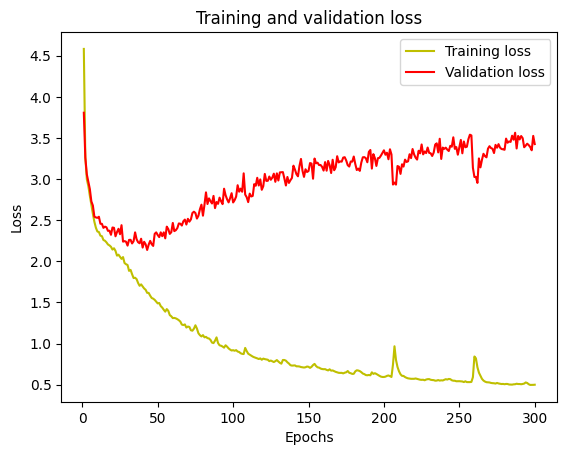

In [43]:
###
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

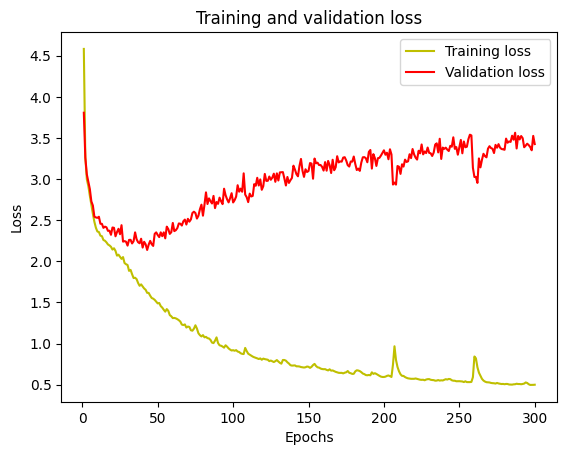

In [44]:
###
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

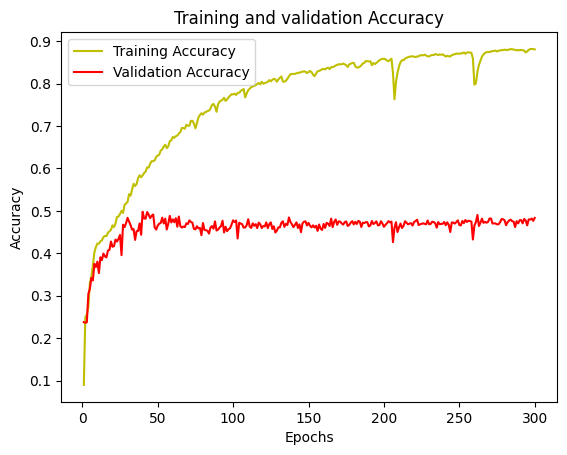

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

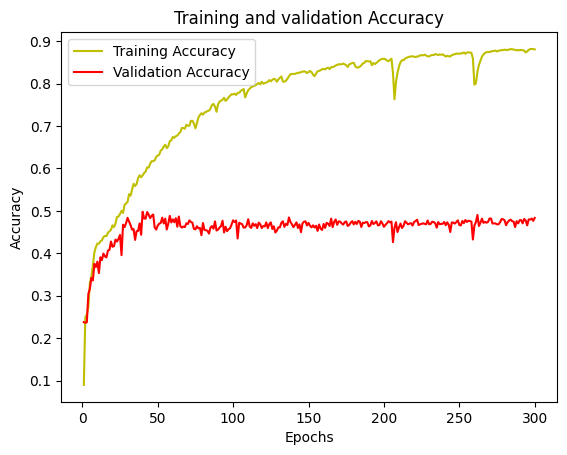

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)

3/3 [==============================] - 0s 44ms/step


In [48]:
y_test.shape

(80, 128, 128, 1)

In [49]:
#Using built in keras function
from keras.metrics import MeanIoU
n_classes = n_classes
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.030160809


In [50]:
#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)
class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0]+ values[2,0]+ values[3,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1]+ values[2,1]+ values[3,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2]+ values[1,2]+ values[3,2])
class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])

print("IoU for class1 is: ", class1_IoU)
print("IoU for class2 is: ", class2_IoU)
print("IoU for class3 is: ", class3_IoU)
print("IoU for class4 is: ", class4_IoU)


[[2.2796e+04 3.5020e+03 1.3761e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.2840e+04 2.6085e+04 7.0430e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.7396e+04 1.5329e+04 2.3390e+05 ... 4.8800e+02 0.0000e+00 0.0000e+00]
 ...
 [2.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.3000e+01 0.0000e+00 2.3000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 7.1000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]]
IoU for class1 is:  0.29759791
IoU for class2 is:  0.3509775
IoU for class3 is:  0.7618992
IoU for class4 is:  0.74542737


Text(0.5, 1.0, 'Mask')

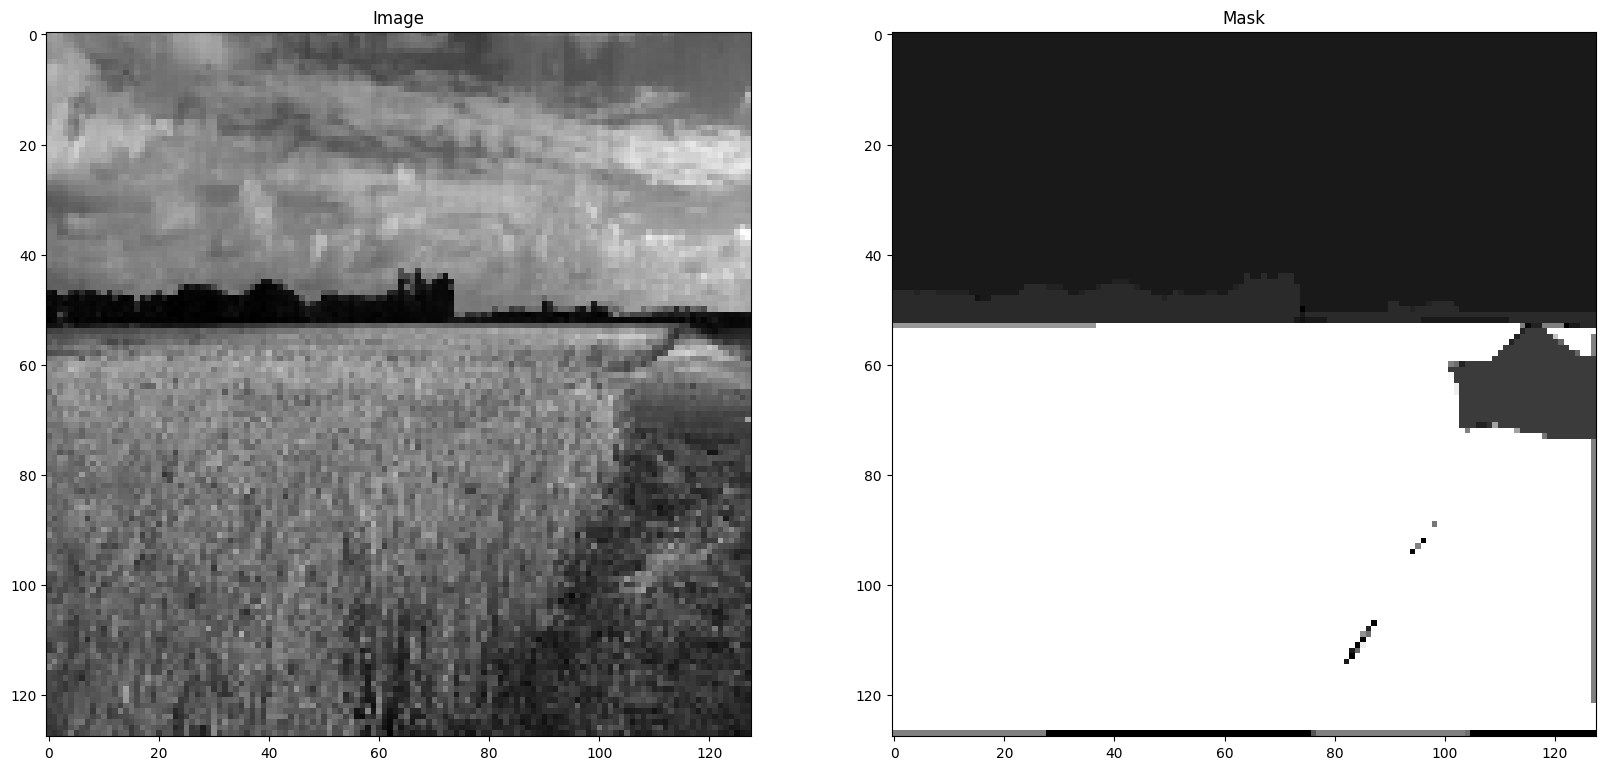

In [51]:
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(train_images[1, :,:,0], cmap='gray')
plt.title("Image")
plt.subplot(122)
plt.imshow(train_masks[1],cmap='gray')
plt.title("Mask")

In [55]:
test_img_number = random.randint(0, len(X1))

test_img = X1[test_img_number]
ground_truth=y1[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

1/1 [==============================] - 0s 17ms/step


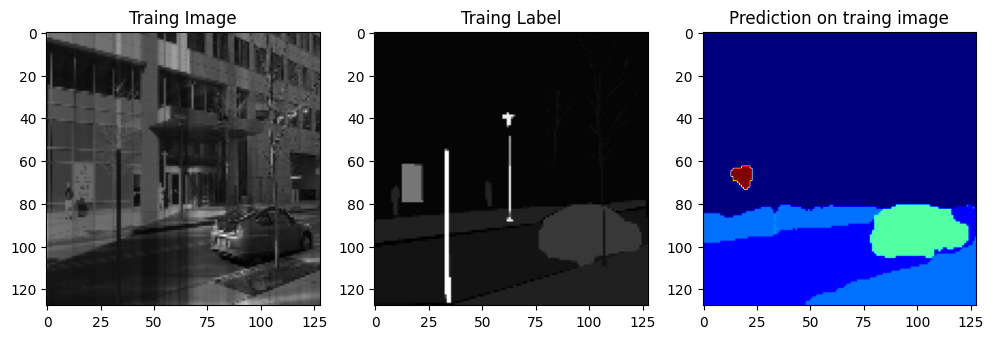

In [56]:

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Traing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Traing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on traing image')
plt.imshow(predicted_img, cmap='jet')
plt.show()


In [57]:
np.unique(predicted_img)

array([ 2,  7, 12, 13, 21, 44])

In [64]:
#Predict on a few images
#model = get_model()
#model.load_weights('???.hdf5')
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]



1/1 [==============================] - 0s 18ms/step


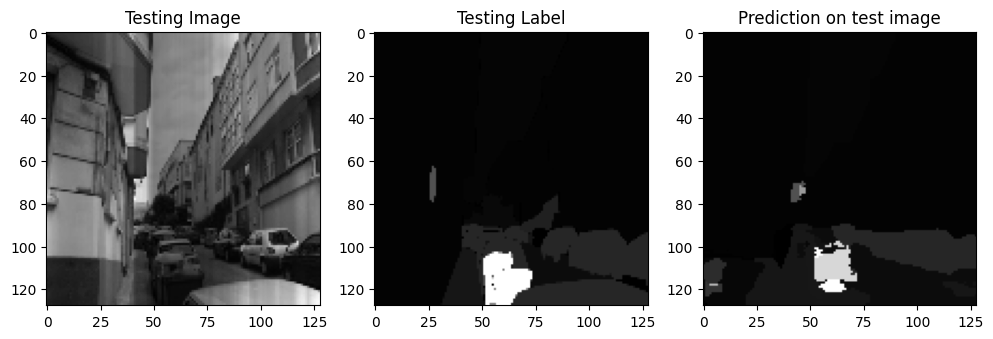

In [65]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='gray')
plt.show()


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!git clone https://github.com/SnehalB06/Scene-Parsing.git

Cloning into 'Scene-Parsing'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33
Receiving objects: 100% (33/33), 41.17 MiB | 19.36 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
cd /content/drive/MyDrive/Scene-Parsing

/content/drive/MyDrive/Scene-Parsing


In [ ]:
cp /content/weights-improvement-45-0.35.hdf5  /content/drive/MyDrive/Scene-Parsing/model

In [ ]:
#Predict on large image

#Apply a trained model on large image

from patchify import patchify, unpatchify

large_image = cv2.imread('large_images/large_image.tif', 0)
#This will split the image into small images of shape [3,3]
patches = patchify(large_image, (128, 128), step=128)  #Step=256 for 256 patches means no overlap

predicted_patches = []
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        print(i,j)

        single_patch = patches[i,j,:,:]
        single_patch_norm = np.expand_dims(normalize(np.array(single_patch), axis=1),2)
        single_patch_input=np.expand_dims(single_patch_norm, 0)
        single_patch_prediction = (model.predict(single_patch_input))
        single_patch_predicted_img=np.argmax(single_patch_prediction, axis=3)[0,:,:]

        predicted_patches.append(single_patch_predicted_img)

predicted_patches = np.array(predicted_patches)

predicted_patches_reshaped = np.reshape(predicted_patches, (patches.shape[0], patches.shape[1], 128,128) )

reconstructed_image = unpatchify(predicted_patches_reshaped, large_image.shape)
plt.imshow(reconstructed_image, cmap='gray')
#plt.imsave('data/results/segm.jpg', reconstructed_image, cmap='gray')

plt.hist(reconstructed_image.flatten())  #Threshold everything above 0

# final_prediction = (reconstructed_image > 0.01).astype(np.uint8)
# plt.imshow(final_prediction)

plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.title('Large Image')
plt.imshow(large_image, cmap='gray')
plt.subplot(222)
plt.title('Prediction of large Image')
plt.imshow(reconstructed_image, cmap='jet')
plt.show()